In [1]:
import random
from matplotlib import pyplot

In [2]:
# Define Cell class to represent each cell in the maze
class Cell:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.visited = False
        
        self.walls = {
            'north': True,
            'south': True,
            'west': True,
            'east': True
        }
    
    def is_visited(self):
        return self.visited
    
    def set_visited(self):
        self.visited = True
    
    def is_wall(self, direction):
        return self.walls[direction]
    
    def remove_wall(self, direction):
        self.walls[direction] = False
        
    def set_wall(self, direction):
        self.walls[direction] = True     

In [3]:
# Define Maze class that hold all cells and randomly generate a maze
class Maze:
    
    def __init__(self, min_size, max_size):
        self.height = random.randint(min_size, max_size)
        self.width = random.randint(min_size, max_size)
        self.maze = [[Cell(x, y) for x in range(self.width)] for y in range(self.height)]
        self.start = None
        self.goal = None
        
        # Generate random start position from edge
        start_x = start_y = 0
        # Based on plot, (0, 0) is at bottom left.
        self.edge = random.choice(['top', 'bottom', 'left', 'right'])
        if self.edge == 'top':
            start_x = random.randint(0, self.width - 1)
            start_y = self.height - 1
        elif self.edge == 'bottom':
            start_x = random.randint(0, self.width - 1)
            start_y = 0
        elif self.edge == 'left':
            start_x = 0
            start_y = random.randint(0, self.height - 1)
        elif self.edge == 'right':
            start_x = self.width - 1
            start_y = random.randint(0, self.height - 1)
        self.start = self.maze[start_y][start_x]
        
        # Remove entering wall for start position
        if self.edge == 'top':
            self.start.remove_wall('north')
        elif self.edge == 'bottom':
            self.start.remove_wall('south')
        elif self.edge == 'left':
            self.start.remove_wall('west')
        elif self.edge == 'right':
            self.start.remove_wall('east')
        
        # Generate random goal position
        self.goal = random.choice(random.choice(self.maze))
        # Make sure goal position is some distance away
        while abs(self.goal.x - self.start.x) < self.width//2 or abs(self.goal.y - self.start.y) < self.height // 2:
            self.goal = random.choice(random.choice(self.maze))
            
        # Use stack to keep track of visited cells
        self.stack = []
        
    def get_unvisited_neighbors(self, cell):
        directions = ['north', 'south', 'west', 'east']
        # Make sure there's no pattern when visiting neighbor cells
        random.shuffle(directions)
        
        neighbors = []
        x, y = cell.x, cell.y
        # Check if cells are available
        for d in directions:
            if d == 'north' and y + 1 < self.height:
                north_cell = self.maze[y + 1][x]
                if not north_cell.is_visited():
                    neighbors.append(north_cell)
            elif d =='south' and y > 0:
                south_cell = self.maze[y - 1][x]
                if not south_cell.is_visited():
                    neighbors.append(south_cell)
            elif d == 'west' and x > 0:
                west_cell = self.maze[y][x - 1]
                if not west_cell.is_visited():
                    neighbors.append(west_cell)
            elif d == 'east' and x + 1 < self.width:
                east_cell = self.maze[y][x + 1]
                if not east_cell.is_visited():
                    neighbors.append(east_cell)
        return neighbors
    
    def remove_walls(self, current_cell, next_cell):
        # If moving to north
        if current_cell.y < next_cell.y:
            current_cell.remove_wall('north')
            next_cell.remove_wall('south')
        # If moving to south
        elif current_cell.y > next_cell.y:
            current_cell.remove_wall('south')
            next_cell.remove_wall('north')
        # If moving to east
        elif current_cell.x < next_cell.x:
            current_cell.remove_wall('east')
            next_cell.remove_wall('west')
        # If moving to west
        elif current_cell.x > next_cell.x:
            current_cell.remove_wall('west')
            next_cell.remove_wall('east')
    
    # Using Depth-First Search
    def generate_maze(self):
        self.start.set_visited()
        self.stack.append(self.start)
        
        while len(self.stack) > 0:
            current_cell = self.stack[-1]
            unvisited = self.get_unvisited_neighbors(current_cell)
            
            if len(unvisited) > 0:
                next_cell = random.choice(unvisited)
                self.remove_walls(current_cell, next_cell)
                next_cell.set_visited()
                self.stack.append(next_cell)
            else:
                self.stack.pop()
                
    def display_maze(self):
        
        # Turn interactive plotting off
        pyplot.ioff()
        
        figure, axes = pyplot.subplots()
        axes.set_aspect('equal') # ensure cells are displayed as squares
        
        # Set range of the axes
        axes.set_xlim(0, self.width)
        axes.set_ylim(0, self.height)
        
        # Remove ticks and labels
        axes.set_xticks([])
        axes.set_yticks([])
        
        # Remove border lines
        axes.axis('off')
        
        # Draw walls
        for y in range(self.height):
            for x in range(self.width):
                cell = self.maze[y][x]
                
                if cell.is_wall('south'):
                    axes.plot([x, x + 1], [y, y], color='black')
                
                # Draw north wall for topmost cell
                if y == self.height - 1 and cell.is_wall('north'):
                    axes.plot([x, x + 1], [y + 1, y + 1], color='black')
                
                if cell.is_wall('west'):
                    axes.plot([x, x], [y, y + 1], color='black')
                
                # Draw east wall for rightmost cell
                if x == self.width - 1 and cell.is_wall('east'):
                    axes.plot([x + 1, x + 1], [y, y + 1], color='black')
                
                # Label start and goal positions
                if self.start != None and cell == self.start:
                    if self.edge == 'top':
                        axes.text(x + 0.5, y + 1, u'\u2193', ha='center', va='center', color='green')
                    elif self.edge == 'bottom':
                        axes.text(x + 0.5, y, u'\u2191', ha='center', va='center', color='green')
                    elif self.edge == 'left':
                        axes.text(x, y + 0.5, u'\u2192', ha='center', va='center', color='green')
                    elif self.edge == 'right':
                        axes.text(x + 1, y + 0.5, u'\u2190', ha='center', va='center', color='green')
                elif self.goal != None and cell == self.goal:
                    axes.text(x + 0.5, y + 0.5, u'\u2605', ha='center', va='center', fontsize=9, color='red')
        
        # Save the plot
        pyplot.savefig('result.png', dpi=400)
        
        pyplot.show()
        
        pyplot.close()

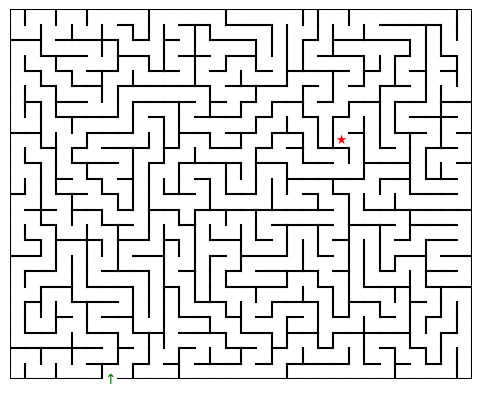

In [4]:
maze = Maze(20, 40)
maze.generate_maze()
maze.display_maze()